![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

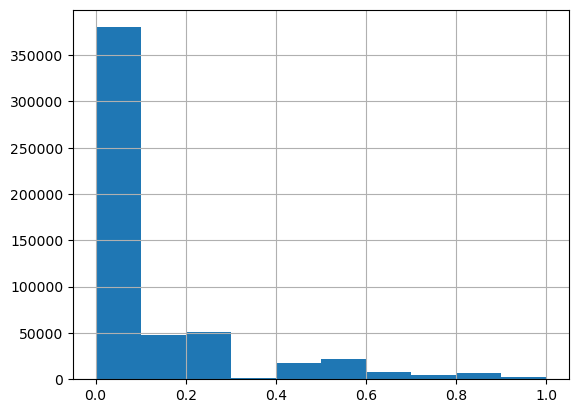

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)
model = LinearRegression()
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred)
mse

0.0372181566739963


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))
X_train_transformed_trigram = vectorizer_trigram.fit_transform(X_train)
X_test_transformed_trigram = vectorizer_trigram.transform(X_test)

model_trigram = LinearRegression()
model_trigram.fit(X_train_transformed_trigram, y_train)

y_pred_trigram = model_trigram.predict(X_test_transformed_trigram)
mse_trigram = mean_squared_error(y_test, y_pred_trigram)

mse_trigram

0.03980322453445695

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

### <font color='blue'> Descripción de TF-IDF (TfidfVectorizer)
TF-IDF es una abreviatura de Term Frequency Inverse Document Frequency. Este es un algoritmo que ayuda a transformar texto en una representación significativa de números que se utilizan para ajustar el algoritmo de machine learning para realizar predicciones. Asimismo,TfidfVectorizer es una librería de la biblioteca de Python (Scikit-learn) que se utiliza para convertir una colección de documentos de texto en una matriz de características TF-IDF.
    
De lo que pudimos investigar, tenemos dos conceptos muy importantes:

##### <font color='blue'>TF (Frecuencia de Término)
Indica cuántas veces se menciona una palabra específica dentro de un texto dado. Para ajustar el impacto de la longitud del documento, este conteo se ajusta dividiendo entre el total de palabras presentes en el documento. De esta manera, se asegura que textos más extensos no dominen el análisis solo por su mayor cantidad de palabras.

##### <font color='blue'> IDF (Frecuencia Inversa del Documento): 
Evalúa la relevancia general de una palabra a lo largo de todos los documentos disponibles. Se determina utilizando el logaritmo de la división entre el número total de documentos y la cantidad de documentos que incluyen el término en cuestión. Este cálculo permite valorar más a las palabras que aparecen con menor frecuencia en el conjunto total de textos, reduciendo la influencia de términos comunes como "y", "el", entre otros.

##### <font color='blue'> Funcionamiento 
<font color='blue'>$$
\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
$$


Esta fórmula resulta en pesos más altos para términos que son únicos para un documento en particular, mientras que los términos comunes a muchos o todos los documentos reciben pesos más bajos. Estos pesos se utilizan luego para transformar el texto en un formato numérico que los modelos de aprendizaje automático pueden procesar eficientemente.
    
Entonces, primero se realiza la tokenización (se divide el texto en unidades básicas) eliminando signos de puntuación u otros elementos o espacios innecesarios; luego se hace un cálculo del la frecuencia de cada palabra en el texto (TF), se evalúa qué tan común o rara es dicha palabra (IDF), se multiplican ambos para obtener el peso TF-IDF.
   
##### <font color='blue'> Ventajas 
**<font color='blue'>1. Relevancia de Palabras:**  Destaca palabras importantes que son específicas de un documento en lugar de palabras comunes en todo texto.<br>
**<font color='blue'>2. Mejora de la precisión del modelo:** Al dar más importancia a términos distintivos, puede mejorar la precisión de los modelos de clasificación de textos y sistemas de recuperación de información.<br>
**<font color='blue'>3. Escalabilidad:** Es eficiente en el manejo de grandes volúmenes de texto.
##### <font color='blue'> Desventajas

**<font color='blue'>1. Falta de contexto y Semántica:**  No hace uso de similitudes semánticas entre palabras (por ejemplo, "no es radical" y "es radical" parecerían similares).  
**<font color='blue'>2. Tiempo en procesamiento**. Dado que calcula la similitud de documentos directamente en el espacio de recuento de palabras, 
    
    
    
###### <font color='blue'>Fuentes Consultadas:
1. https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a (TF-IDF Vectorizador scikit-learn / Autor:   Mukesh Chaudhary - Año: 2020)
2. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html (Biblioteca y documentación de TfidfVectorizer) 
3. https://medium.com/@shandeep92/countvectorizer-vs-tfidfvectorizer-cf62d0a54fa4 (CountVectorizer vs TfidfVectorizer /Autor: 
Shandeep Singh)


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
vectorizer_tfidf = TfidfVectorizer()
X_train_transformed_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_transformed_tfidf = vectorizer_tfidf.transform(X_test)

model_tfidf = LinearRegression()
model_tfidf.fit(X_train_transformed_tfidf, y_train)

y_pred_tfidf = model_tfidf.predict(X_test_transformed_tfidf)
mse_tfidf = mean_squared_error(y_test, y_pred_tfidf)

mse_tfidf

0.02800630870893227

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

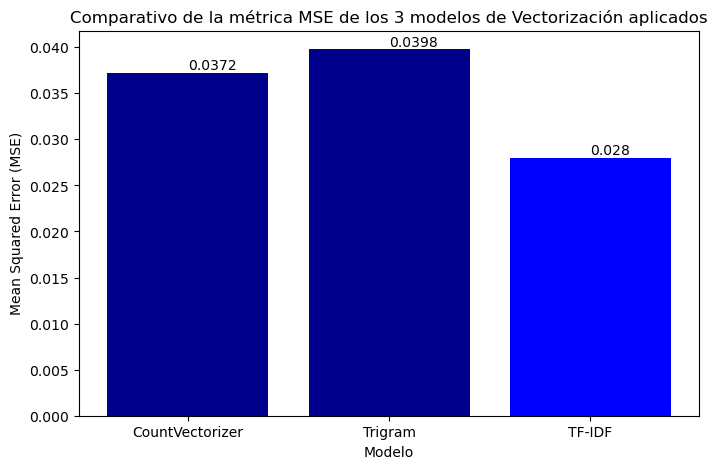

In [2]:
import matplotlib.pyplot as plt
### Para no volver a ejecutar el código por el tiempo de procesamiento.
mse=0.0372181566739963
mse_trigram = 0.03980322453445695
mse_tfidf=0.02800630870893227
modelos = ['CountVectorizer', 'Trigram', 'TF-IDF']
mse_modelos = [mse, mse_trigram, mse_tfidf]
colors = ['darkblue', 'darkblue', 'blue']

plt.figure(figsize=(8, 5))
bars = plt.bar(modelos, mse_modelos, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom')  # va: vertical alignment

plt.title('Comparativo de la métrica MSE de los 3 modelos de Vectorización aplicados')
plt.xlabel('Modelo')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()


### <font color='blue'>Los valores de MSE son:

1. CountVectorizer: 0.0372
2. Trigramas con CountVectorizer: 0.0398
3. TF-IDF: 0.0280 (mejor)


### <font color='blue'>Comentarios sobre el desempeño de cada modelo:
**<font color='blue'>CountVectorizer (Básico):** Este método convierte texto en un formato numérico mediante la creación de una matriz donde cada columna representa una palabra en el vocabulario y cada fila representa un documento o comentario, con valores que reflejan la frecuencia de cada palabra en el documento. Un MSE de 0.0372 indica un desempeño mejor que el de Trigram.<br><br>
**<font color='blue'>Trigramas con CountVectorizer:** Al emplear trigramas, intentamos capturar más contexto al considerar secuencias de tres palabras como una sola unidad. Esto pudo haber sido más útil para capturar frases comunes o patrones específicos en datos textuales. Sin embargo, usarlo genera una alta dimensionalidad y posiblemente a una dispersión mayor en los datos, lo que podría por qué el MSE alcanzó el nivel de 0.0398. <br><br>
**<font color='blue'>TF-IDF (TfidfVectorizer):** El MSE más bajo de 0.0280 sugiere que esta técnica fue más efectiva para predecir la toxicidad, probablemente porque destaca términos únicos y relevantes que son indicativos de comentarios tóxicos.